##Parte 1









###ejercicio 2

####A

In [3]:
#prmero importamos lo necesario
import pandas as pd
import os

In [4]:
# Cargamos las 2 eph
df_1= pd.read_stata("usu_individual_T105.dta")
df_2 = pd.read_excel("usu_individual_T125.xlsx")


In [5]:
#creamos una copia
df_1_a= df_1.copy()
df_2_a= df_2.copy()

In [6]:
# Reemplazamos variables categroricas en texto por numero
df_1_a["region"] = df_1_a["region"].replace({"Gran Buenos Aires":1})
df_1_a["ch04"] = df_1_a["ch04"].replace({"Varón":1,"Mujer":2})
df_1_a["ch06"] = df_1_a["ch06"].replace({"Menos de 1 año":-1,"98 y más años":98})
df_1_a["ch07"] = df_1_a["ch07"].replace({"Unido":1,"Casado":2,"Separado o divorciado":3,"Viudo":4,"Soltero":5,"Ns./Nr.":0})
df_1_a["ch08"] = df_1_a["ch08"].replace({"Obra social (incluye PAMI)":1,"Mutual/Prepaga/Servicio de emergencia":2,"Planes y seguros públicos":3,"No paga ni le descuentan":4,
                                         "Ns./Nr.":9,"Obra social y mutual/prepaga/servicio de emergencia":12,"Obra social y planes y seguros públicos":13,
                                         "Mutual/prepaga/servicio de emergencia/planes y seguros públi":23,
                                         "Obra social, mutual/prepaga/servicio de emergencia y planes":123})
df_1_a["nivel_ed"] = df_1_a["nivel_ed"].replace({"Primaria Incompleta (incluye educación especial)":1,"Primaria Completa":2,"Secundaria Incompleta":3,"Secundaria Completa":4,
                                                 "Superior Universitaria Incompleta":5,"Superior Universitaria Completa":6,"Sin instrucción":7,"Ns./ Nr.":9})
df_1_a["estado"] = df_1_a["estado"].replace({"Entrevista individual no realizada (no respuesta al cuestion":0,"Ocupado":1,"Desocupado":2,"Inactivo":3,"Menor de 10 años":4})
df_1_a["cat_inac"] = df_1_a["cat_inac"].replace({"Jubilado/pensionado":1,"Rentista":2,"Estudiante":3,"Ama de casa":4,"Menor de 6 años":5,"Discapacitado":6,"Otros":7})
df_1_a["pp10a"] = df_1_a["pp10a"].replace({"...menos de 1 mes?":1,"...de 1 a 3 meses?":2,"...más de 3 a 6 meses?":3,"...más de 6 a 12 meses?":4,"...más de 1 año?":5})
df_1_a["pp03j"] = df_1_a["pp03j"].replace({"Sí":1,"No":2,"Ns./Nr.":9})
df_1_a["pp04a"] = df_1_a["pp04a"].replace({"...estatal?":1,"...privada?":2,"...de otro tipo? (especificar)":3,"Ns./Nr.":0})
   #df_2
df_2_a["PP10A"] = df_2_a["PP10A"].fillna(0)
df_2_a["PP03J"] = df_2_a["PP03J"].fillna(0)
df_2_a["PP04A"] = df_2_a["PP04A"].fillna(0)
df_2_a["P47T"] = df_2_a["P47T"].fillna(0)


/tmp/ipython-input-1085324873.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_1_a["region"] = df_1_a["region"].replace({"Gran Buenos Aires":1})
/tmp/ipython-input-1085324873.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1_a["ch04"] = df_1_a["ch04"].replace({"Varón":1,"Mujer":2})
/tmp/ipython-input-1085324873.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, u

In [7]:
#En el primero df tenemos los nombres en minuscula, por lo cual primero renombramos las columnas de interes a mayuscula
df_1_a1=df_1_a.copy() #para no alterar la celda anterior al cambiar los nombres
df_1_a1.columns = df_1_a1.columns.str.upper()

In [8]:
#vemos los cambio
df_1_a1

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,125098,1.0,1.0,Sí,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1017.0,...,08,,07,08,,05,0.0,0.0,0.0,00000
1,125188,1.0,1.0,Sí,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,40020
2,125188,1.0,2.0,Sí,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
3,125188,1.0,3.0,0.0,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
4,125242,1.0,1.0,Sí,2005.0,1er. Trimestre,1,S,Ciudad de Buenos Aires,1103.0,...,09,,09,09,,07,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47025,288015,1.0,3.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,129.0,...,09,10,09,,10,07,0.0,0.0,0.0,00000
47026,288015,1.0,4.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,129.0,...,09,10,09,,10,07,0.0,0.0,0.0,00000
47027,288294,1.0,1.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,107.0,...,10,10,09,,10,09,0.0,0.0,0.0,00000
47028,288294,1.0,2.0,Sí,2005.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,107.0,...,10,10,09,,10,09,0.0,0.0,0.0,00000


In [9]:
# Fitramos unicamente los datos para la región seleccionada
df_1_b= df_1_a1[df_1_a1["REGION"] == 1].copy()
df_2_b= df_2_a[df_2_a["REGION"] == 1].copy()

In [10]:
# Seleccionamos las 15 variables de interes
variables_de_interes = ['REGION','ANO4','CH04','CH06','CH07','CH08','NIVEL_ED','ESTADO','CAT_INAC','PP10A','PP03J','PP04A','P21','P47T','ITF','IPCF']
df_1_c= df_1_b[variables_de_interes].copy()
df_2_c= df_2_b[variables_de_interes].copy()

In [11]:
# Observamos el tipo de dato almacenado por variable en cada df, para ello armamos un cuadro comparativo
    # Tipos de datos por df
tipos_df1 = df_1_c.dtypes.astype(str)
tipos_df2 = df_2_b.dtypes.astype(str)

In [12]:
    # Creamos el df comparativo
comparativo_datos = pd.DataFrame({
    "df_1_c": tipos_df1[variables_de_interes],
    "df_2_c": tipos_df2[variables_de_interes]
})

In [13]:
    # Usamos las variables como indices de las filas para leer mas facil
comparativo_datos = comparativo_datos.set_index(pd.Index(variables_de_interes))
print(comparativo_datos)

            df_1_c   df_2_c
REGION    category    int64
ANO4       float64    int64
CH04      category    int64
CH06      category    int64
CH07      category    int64
CH08      category  float64
NIVEL_ED  category    int64
ESTADO    category    int64
CAT_INAC  category    int64
PP10A     category  float64
PP03J     category  float64
PP04A     category  float64
P21        float64    int64
P47T       float64  float64
ITF        float64    int64
IPCF       float64  float64


In [14]:
# Compatibilizamos los tipos de datos en ambas variables
    # region: pasamos los datos de df_1 a int64
df_1_c['REGION'] =df_1_c['REGION'].astype(str).astype(int)
    # ano4: pasamos los datos de df_1 a int64
df_1_c['ANO4'] = df_1_c['ANO4'].astype(int)
    # ch04: pasamos los datos de df_1 a int64
df_1_c['CH04'] = df_1_c['CH04'].astype(int)
    # ch06: pasamos los datos de df_1 a int64
df_1_c['CH06'] = df_1_c['CH06'].astype(int)
    #ch07: pasamos los datos de df_1 a int64
df_1_c['CH07'] = df_1_c['CH07'].astype(int)
    #ch08: pasamos los datos de df_1 a int64
df_1_c['CH08'] = df_1_c['CH08'].astype(int)
    #NIVEL_ED: pasamos los datos de_1 a int64
df_1_c['NIVEL_ED'] = df_1_c['NIVEL_ED'].astype(int)
    #estado: pasamos los datos de df_1 a int64
df_1_c['ESTADO'] = df_1_c['ESTADO'].astype(int)
    #cat_inac: pasamos los datos de df_1 a int64
df_1_c['CAT_INAC'] = df_1_c['CAT_INAC'].astype(int)
    #pp10a: pasamos los datos de df_1 a int64
df_1_c['PP10A'] = df_1_c['PP10A'].astype(int)
    #pp03j: pasamos los datos de df_1 a int64
df_1_c['PP03J'] = df_1_c['PP03J'].astype(int)
    #pp04a: pasamos los datos de df_1 a int64
df_1_c['PP04A'] = df_1_c['PP04A'].astype(int)
    #p21: pasamos los datos de df_1 a int64
df_1_c['P21'] = df_1_c['P21'].astype(int)
    #p47t: pasamos los datos de df_1 a int64
df_1_c['P47T'] = df_1_c['P47T'].astype(int)
    #itf: pasamos los datos de df_1 a int64
df_1_c['ITF'] = df_1_c['ITF'].astype(int)
    #ipcf: pasamos los datos de df_1 a int64
df_1_c['IPCF'] = df_1_c['IPCF'].astype(int)


 #df_2
    #ch08: pasamos los datos de df_2 a int64
df_2_c['CH08'] = df_2_c['CH08'].astype(int)
    #pp10a: pasamos los datos de df_2 a int64
df_2_c['PP10A'] = df_2_c['PP10A'].astype(int)
    #pp03j: pasamos los datos de df_2 a int64
df_2_c['PP03J'] = df_2_c['PP03J'].astype(int)
    #pp04a: pasamos los datos de df_2 a int64
df_2_c['PP04A'] = df_2_c['PP04A'].astype(int)
    #p47t: pasamos los datos de df_2 a int64
df_2_c['P47T'] = df_2_c['P47T'].astype(int)
    #ipcf: pasamos los datos de df_2 a int64
df_2_c['IPCF'] = df_2_c['IPCF'].astype(int)






In [15]:
# Corroboramos que ahora todos los tipos de datos sean iguales

tipos_df1_a = df_1_c.dtypes.astype(str)
tipos_df2_a= df_2_c.dtypes.astype(str)

    # Creamos el df comparativo
comparativo_datos = pd.DataFrame({
    "df_1_c": tipos_df1_a,
    "df_2_c": tipos_df2_a
})
    # Usamos las variables como indices de las filas para leer mas facil
comparativo_datos = comparativo_datos.set_index(pd.Index(variables_de_interes))
print("Vemos los datos compatibilizados")
print(comparativo_datos)

Vemos los datos compatibilizados
         df_1_c df_2_c
REGION    int64  int64
ANO4      int64  int64
CH04      int64  int64
CH06      int64  int64
CH07      int64  int64
CH08      int64  int64
NIVEL_ED  int64  int64
ESTADO    int64  int64
CAT_INAC  int64  int64
PP10A     int64  int64
PP03J     int64  int64
PP04A     int64  int64
P21       int64  int64
P47T      int64  int64
ITF       int64  int64
IPCF      int64  int64


In [16]:
# en este paso adjuntamos al final los datos de las dos base de datos
df_comp= pd.concat([df_1_c, df_2_c])
print(df_comp.shape)
df_comp

(16665, 16)


,REGION,ANO4,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,PP10A,PP03J,PP04A,P21,P47T,ITF,IPCF
0,1,2005,1,80,4,1,3,3,1,0,0,0,0,583,583,583
1,1,2005,1,26,2,4,4,1,0,0,1,2,300,450,450,150
2,1,2005,2,27,2,4,6,3,4,0,0,0,0,0,450,150
3,1,2005,2,-1,5,4,7,4,5,0,0,0,0,0,450,150
4,1,2005,2,71,4,1,2,3,1,0,0,0,0,855,855,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45259,1,2025,1,49,2,1,3,1,0,0,2,2,700000,700000,0,0
45260,1,2025,2,51,2,1,6,1,0,0,9,2,500000,500000,0,0
45261,1,2025,2,22,5,1,6,1,0,0,1,2,-9,-9,0,0
45262,1,2025,1,26,5,1,3,3,3,0,0,0,0,0,0,0


In [17]:
# Corroboramos que se hayan unido correctamente ambas base
print(df_1_c.shape)
print(df_2_c.shape)
print(df_comp.shape)


(9484, 16)
(7181, 16)
(16665, 16)


####B

In [18]:
#imporatmos las expanciones necesarias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
#hacemos una copia para no alterar la base original
df_comp_1 = df_comp.copy()

In [20]:
# en este paso tranformaremos todas las columnas donde antes convertimos el NaN(valores faltantes) en numeros de vuelta en Nan
cols = ["CH07","CH08","NIVEL_ED","PP03J","PP10A","PP04A","P47T"]
df_comp_1[cols] = df_comp_1[cols].replace([9, 0], np.nan)

print(df_comp_1)

       REGION  ANO4  CH04  CH06  CH07  CH08  NIVEL_ED  ESTADO  CAT_INAC  \
0           1  2005     1    80   4.0   1.0         3       3         1   
1           1  2005     1    26   2.0   4.0         4       1         0   
2           1  2005     2    27   2.0   4.0         6       3         4   
3           1  2005     2    -1   5.0   4.0         7       4         5   
4           1  2005     2    71   4.0   1.0         2       3         1   
...       ...   ...   ...   ...   ...   ...       ...     ...       ...   
45259       1  2025     1    49   2.0   1.0         3       1         0   
45260       1  2025     2    51   2.0   1.0         6       1         0   
45261       1  2025     2    22   5.0   1.0         6       1         0   
45262       1  2025     1    26   5.0   1.0         3       3         3   
45263       1  2025     2     6   5.0   1.0         1       4         3   

       PP10A  PP03J  PP04A     P21      P47T  ITF  IPCF  
0        NaN    NaN    NaN       0     58

In [21]:
# Contar valores faltantes por año y columna
df_comp_1 = df_comp_1.groupby('ANO4').apply(lambda x: x.notnull().mean() * 100)

/tmp/ipython-input-321517701.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_comp_1 = df_comp_1.groupby('ANO4').apply(lambda x: x.notnull().mean() * 100)


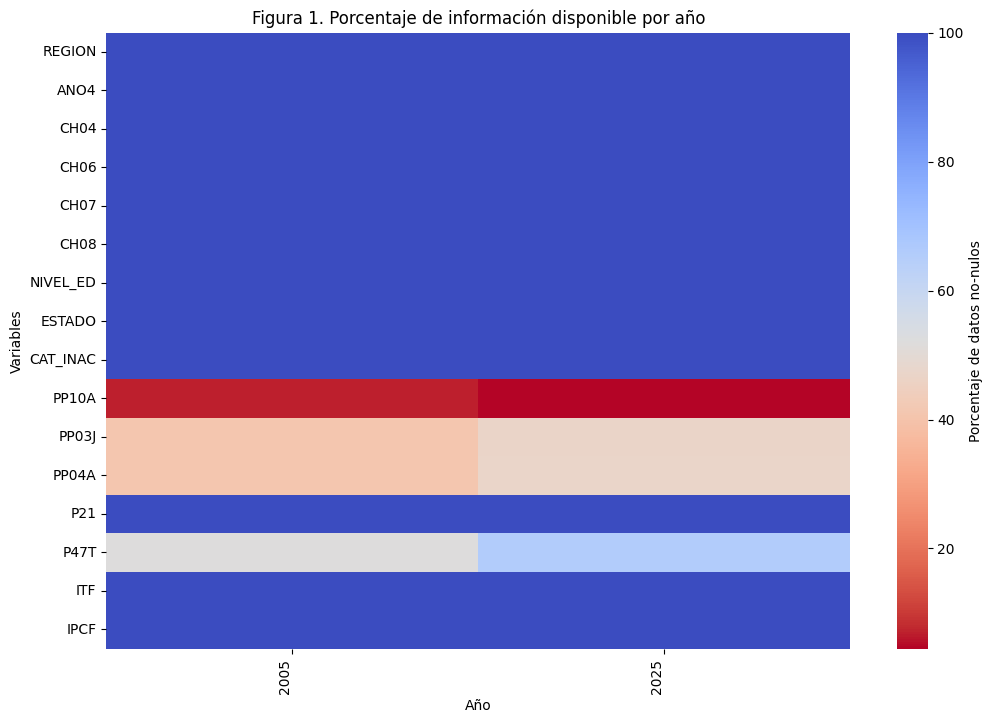

In [22]:
# en este paso desiñaremos como se compone la figura de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_comp_1.T, annot=False, cmap="coolwarm_r",cbar_kws={'label': 'Porcentaje de datos no-nulos'})
plt.title("Figura 1. Porcentaje de información disponible por año")
plt.xlabel("Año")
plt.xticks(rotation=90, ha='right')
plt.ylabel("Variables")
plt.yticks(rotation=0)
plt.show()

# Parte 2

ejercicio 3

In [23]:
# fusionamos los datos de las dos fuentes de datos originales
df_comp = pd.concat([df_1_c, df_2_c])
print(df_comp.shape)
df_comp

(16665, 16)


,REGION,ANO4,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,PP10A,PP03J,PP04A,P21,P47T,ITF,IPCF
0,1,2005,1,80,4,1,3,3,1,0,0,0,0,583,583,583
1,1,2005,1,26,2,4,4,1,0,0,1,2,300,450,450,150
2,1,2005,2,27,2,4,6,3,4,0,0,0,0,0,450,150
3,1,2005,2,-1,5,4,7,4,5,0,0,0,0,0,450,150
4,1,2005,2,71,4,1,2,3,1,0,0,0,0,855,855,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45259,1,2025,1,49,2,1,3,1,0,0,2,2,700000,700000,0,0
45260,1,2025,2,51,2,1,6,1,0,0,9,2,500000,500000,0,0
45261,1,2025,2,22,5,1,6,1,0,0,1,2,-9,-9,0,0
45262,1,2025,1,26,5,1,3,3,3,0,0,0,0,0,0,0


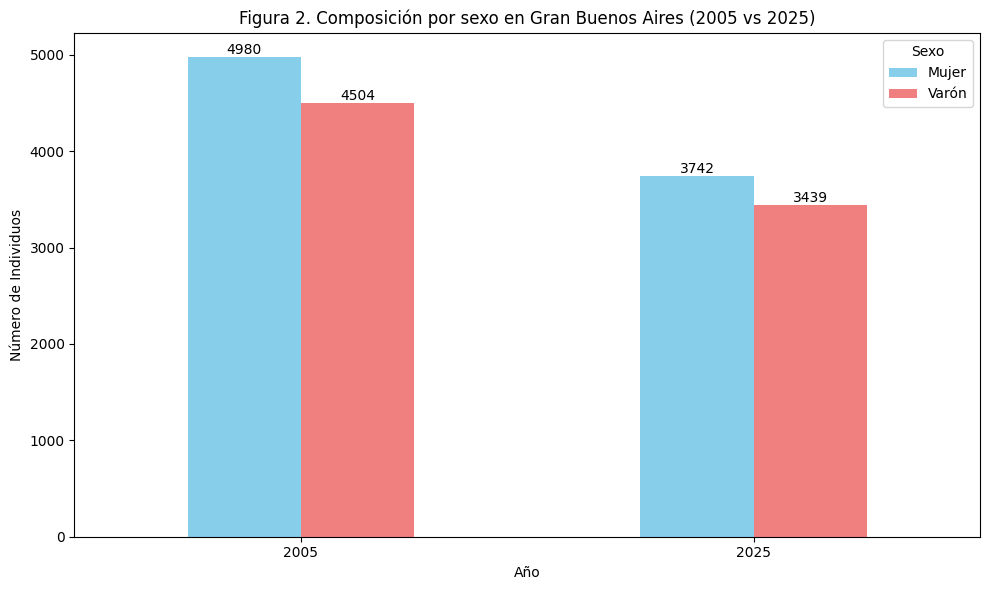

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Paso 1: Filtrar los datos para los años 2005 y 2025
df_filtered_years = df_comp[df_comp['ANO4'].isin([2005, 2025])].copy()

# Paso 2: Asignar códigos numéricos de sexo a etiquetas descriptivas
sex_mapping = {1: 'Varón', 2: 'Mujer'}
df_filtered_years['SEXO_DESC'] = df_filtered_years['CH04'].map(sex_mapping)

# Paso 3: Agrupamps por año y sexo, y contamos
sex_composition = df_filtered_years.groupby(['ANO4', 'SEXO_DESC']).size().unstack(fill_value=0)

# Paso 4: Creamos el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

sex_composition.plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral'])

# Agregamos título y etiquetas
ax.set_title("Figura 2. Composición por sexo en Gran Buenos Aires (2005 vs 2025)")
ax.set_xlabel("Año")
ax.set_ylabel("Número de Individuos")
ax.tick_params(axis='x', rotation=0)

# Añadimos las etiquetas de datos a las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# agregamos leyenda
ax.legend(title="Sexo")



plt.tight_layout()
plt.show()